## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle. 

[참고 자료](http://sanghyukchun.github.io/62/)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load dataset

file_path = './Lecture_dataset/BNP_Paribas_Cardif_claims/train.csv'
data = pd.read_csv(file_path, nrows=50000)
data.shape

(50000, 133)

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [6]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target

mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.        , 0.0025191 , 0.00327021, 0.00299845, 0.00378967,
       0.00803912, 0.00545398, 0.00483522, 0.02662758, 0.00426389,
       0.01732738, 0.00663514, 0.02256855, 0.00549181, 0.00668217,
       0.00265088, 0.0047318 , 0.00541579, 0.00178591, 0.01177705,
       0.        , 0.00722579, 0.00333621, 0.00182215, 0.00316831,
       0.00273796, 0.00170308, 0.00809695, 0.00850421, 0.00229591,
       0.00272198, 0.00454791, 0.00199211, 0.007789  , 0.00715029,
       0.00563249, 0.00572752, 0.00126634, 0.00467744, 0.00320848,
       0.00485609, 0.00499339, 0.0069453 , 0.03912136, 0.00656354,
       0.0022562 , 0.00568447, 0.00522072, 0.00388263, 0.00235393,
       0.00523672, 0.00313055, 0.00570803, 0.01476016, 0.00550674,
       0.00668076, 0.0065078 , 0.00330906, 0.00132556, 0.0057995 ,
       0.00563422, 0.00864856, 0.00329065, 0.00524128, 0.00286968,
       0.00323545, 0.00576407, 0.00248754, 0.00857129, 0.0042454 ,
       0.00645355, 0.00803758, 0.00352536, 0.00296148, 0.00560

In [8]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039121
v10     0.026628
v14     0.022569
v12     0.017327
v62     0.014760
v129    0.013303
v21     0.011777
v114    0.009953
v72     0.008649
v82     0.008571
v34     0.008504
v33     0.008097
v7      0.008039
v85     0.008038
v39     0.007789
v103    0.007685
v122    0.007676
v130    0.007437
v25     0.007226
v40     0.007150
v49     0.006945
v16     0.006682
v64     0.006681
v106    0.006675
v13     0.006635
v90     0.006630
v126    0.006610
v51     0.006564
v65     0.006508
v84     0.006454
          ...   
v60     0.003131
v5      0.002998
v87     0.002961
v95     0.002929
v77     0.002870
v92     0.002805
v29     0.002738
v36     0.002722
v17     0.002651
v118    0.002537
v2      0.002519
v81     0.002488
v58     0.002354
v35     0.002296
v104    0.002278
v53     0.002256
v38     0.001992
v27     0.001822
v20     0.001786
v32     0.001703
v97     0.001490
v98     0.001431
v115    0.001337
v68     0.001326
v96     0.001276
v43     0.001266
v102    0.001139
v124    0.0000

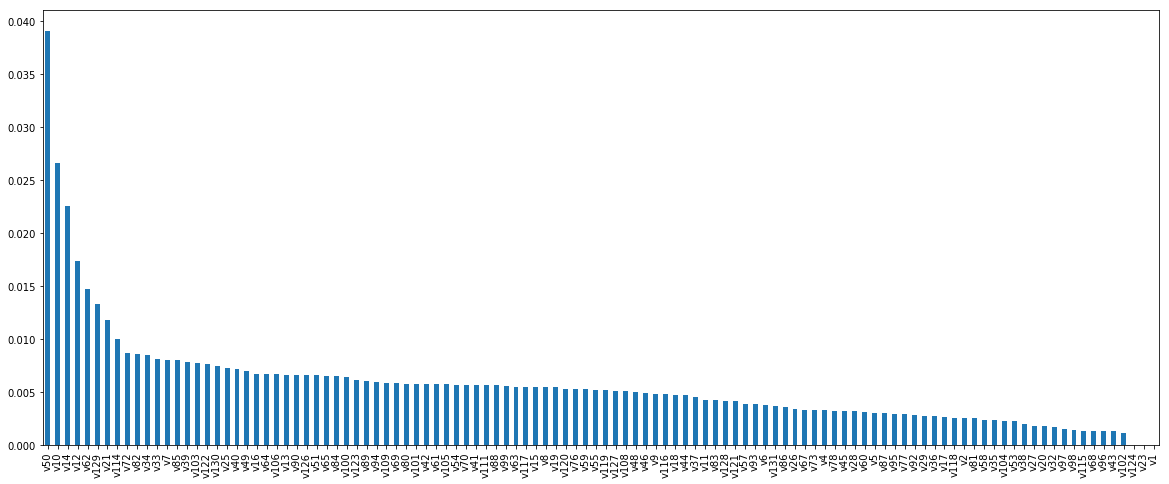

In [9]:
# and now let's plot the ordered MI values per feature

mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [10]:
# here I will select the top 10 features
# which are shown below

sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v50', 'v62', 'v82', 'v93', 'v114', 'v129'], dtype='object')

### Regression

In [11]:
# load dataset
file_path = './Lecture_dataset/House_Sale_Price/train.csv'
data = pd.read_csv(file_path)
data.shape

(1460, 81)

In [12]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [13]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [14]:
# determine the mutual information

mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.525283
GrLivArea        0.480468
TotalBsmtSF      0.381695
GarageArea       0.368435
GarageCars       0.363199
YearBuilt        0.340976
1stFlrSF         0.311987
FullBath         0.275274
GarageYrBlt      0.264663
MSSubClass       0.252730
YearRemodAdd     0.247791
2ndFlrSF         0.236001
LotFrontage      0.211191
TotRmsAbvGrd     0.194122
Fireplaces       0.190375
OpenPorchSF      0.171302
LotArea          0.165403
BsmtFinSF1       0.162453
BsmtUnfSF        0.110940
OverallCond      0.106562
MasVnrArea       0.100842
HalfBath         0.077946
WoodDeckSF       0.066048
BedroomAbvGr     0.046529
ScreenPorch      0.029636
BsmtFullBath     0.022400
MiscVal          0.007146
EnclosedPorch    0.005856
LowQualFinSF     0.004310
3SsnPorch        0.002672
YrSold           0.002388
KitchenAbvGr     0.001646
BsmtHalfBath     0.000999
BsmtFinSF2       0.000000
MoSold           0.000000
PoolArea         0.000000
Id               0.000000
dtype: float64

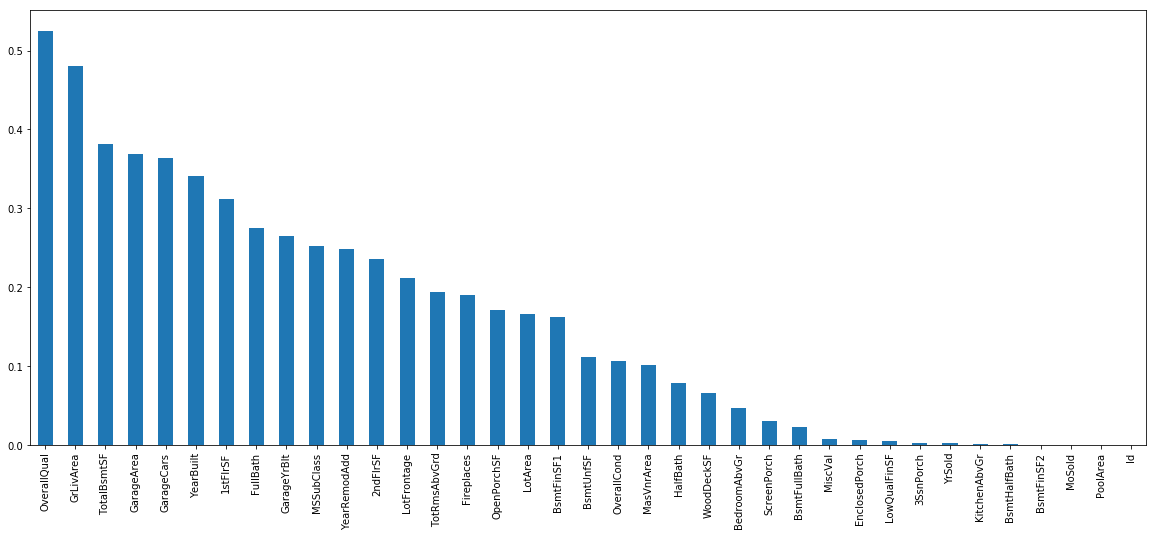

In [15]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [16]:
# here I will select the top 10 percentile

sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!